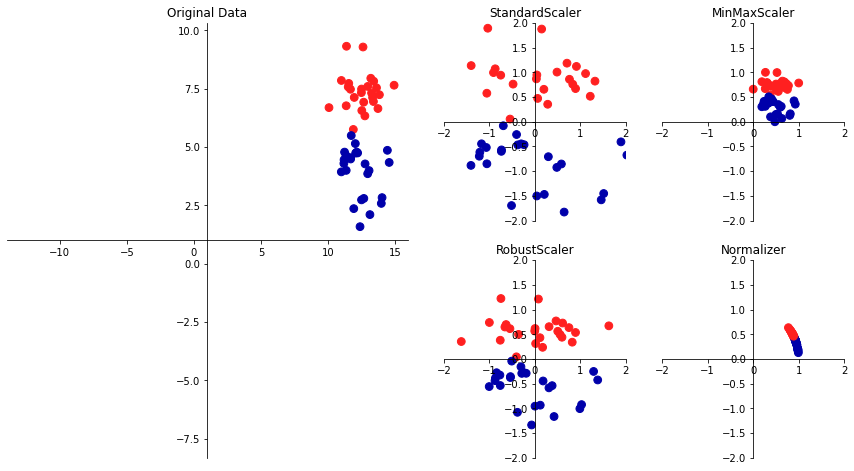

In [5]:
#스케일의 예
import mglearn
mglearn.plots.plot_scaling()


**StandardScaler** : 특성의 평균을 0, 분산을 1로 하여 모든 특성이 같은 값을 가짐(최댓값 최솟값 크기 제한 x)
**RobustScaler** : 중간 값과 사분위 값을 사용 (동떨어진 데이터 포인트에 영향을 받지 않음, **이상치**라고도 함)
**MinMaxScaler** : 모든 특성이 0과 1사이에 위치하도록 변경
**Bormalizer** : 지름이 1인 원에 데이터 포인트를 투영함 -> 벡터의 길이는 상관없고, 데이터의 방향만이 중요할때 사용


## 데이터 변환 적용하기

+ MinMaxScaler사용


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 회귀와 분류 알고리즘과 달리 매개변수가 X_train 훈련데이터만 넘겨주면 된다.
scaler.fit(X_train)

MinMaxScaler()

> 훈련 데이터의 스케일을 조정하려면 스케일 객체의 transform 메서드를 사용한다.

In [8]:
X_train_scaled = scaler.transform(X_train)
print("변환된 후 크기 :",X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값 : \n",X_train.min(axis = 0))
print("스케일 조정 전 특성별 최대값 : \n",X_train.max(axis = 0))
print("스케일 조정 후 특성별 최소값 : \n",X_train_scaled.min(axis = 0))
print("스케일 조정 후 특성별 최대값 : \n",X_train_scaled.max(axis = 0))

변환된 후 크기 : (426, 30)
스케일 조정 전 특성별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [9]:
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis = 0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis = 0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


> + 최솟값과 최댓값이 0과 1이 아님
> + transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고, 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눈다.


##  QuantileTransformer & PowerTransformer

### quantile transformer

+ 1000개의 분위를 사용하여 데이터를 균등하게 분포시킨다.
+ 이상치에 민감하지 않고, 데이터를 0과 1사이로 압축한다.

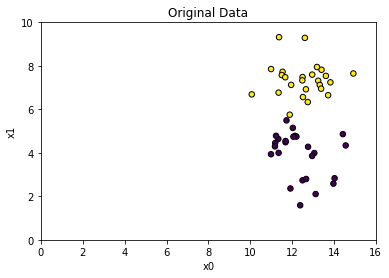

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X,y = make_blobs(n_samples = 50, centers = 2, random_state = 4, cluster_std = 1)
X+=3

plt.scatter(X[:,0], X[:,1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0,16)
plt.xlabel("x0")
plt.ylim(0,10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


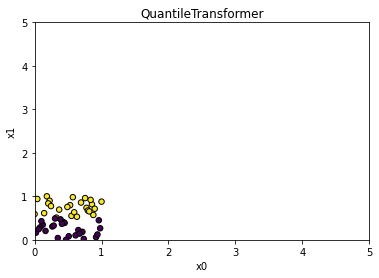

In [11]:
scaler = QuantileTransformer()
X_trans= scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0,5)
plt.xlabel("x0")
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

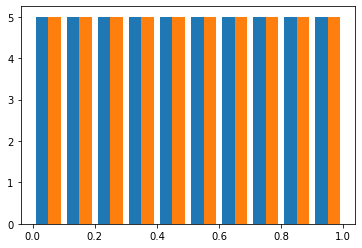

In [12]:
##균등 분포 확인
plt.hist(X_trans)
plt.show()

> 분위 수는 n_quantiles 매개변수에서 설정 가능
> scaler 객체의 quantiles_속성에는 특성별로 계산된 분위 값이 들어 있음 (n_quantiles, n_features)

In [13]:
print(scaler.quantiles_.shape)

(50, 2)


** 데이터셋을 임의로 만들어서 분위로 나누기**
np.percentile() 함수는 지정한 분위에 해당하는 샘플을 추출하여 반환함


In [14]:
import numpy as np
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:,0], [0,25,50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [15]:
#QuantileTransformer 사용해서 변환하여 확인하기
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0,25,50, 75, 100]))
#분위가 똑같이 나오는 것을 확인할 수 있음

[0.   0.25 0.5  0.75 1.  ]


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


위에 나온 QuantileTransformer는 균등 분포! -> ouput_distribution 매개변수를 normal로 바꾸면 정규분포로 출력

C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


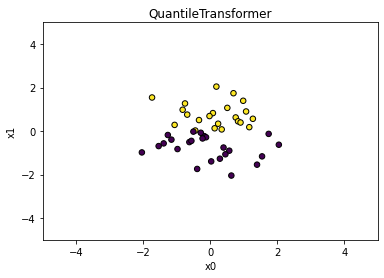

In [16]:
scaler = QuantileTransformer(output_distribution = 'normal')
X_trans = scaler.fit_transform(X)
plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors = 'black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

PowerTransformer -> 데이터의 특성별로 정규분포 형태에 가깝도록 해줌

**QuantileTransformer, StandardScaler, PowerTransformer 비교**


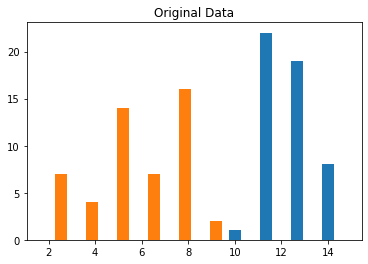

C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


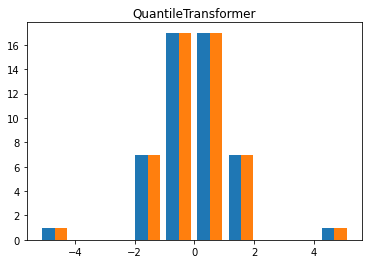

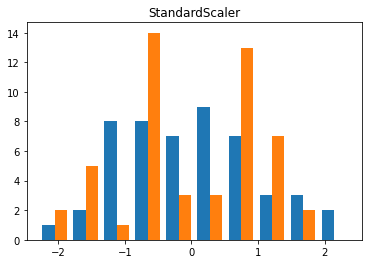

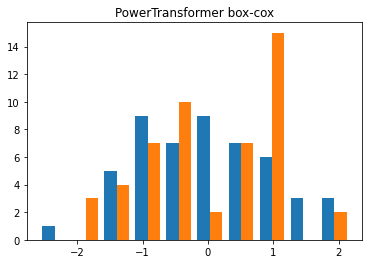

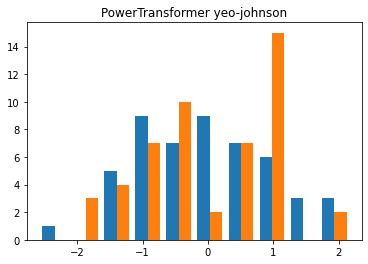

In [21]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution = 'normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method = 'box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method = 'yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()



## 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기
+ 훈련 테스트와 테스트 데이터에는 같은 변환을 적용해야한다.

Text(0.5, 1.0, '잘못 조정된 데이터')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54984 missing from c

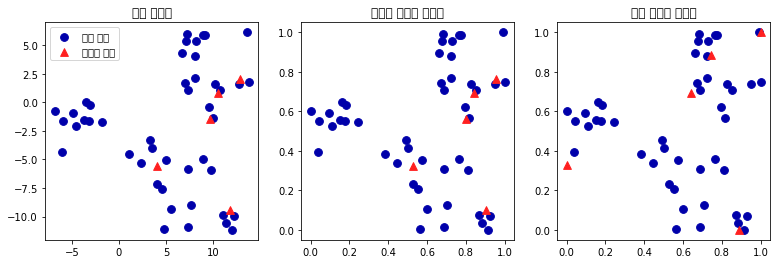

In [24]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)

X_train, X_test = train_test_split(X, random_state = 5, test_size = .1)

fig, axes = plt.subplots(1,3, figsize = (13,4))
axes[0].scatter(X_train[:, 0], X_train[:,1], c=mglearn.cm2.colors[0], label="훈련 세트", s = 60)
axes[0].scatter(X_test[:, 0], X_test[:,1], marker = '^', c=mglearn.cm2.colors[1], label="테스트 세트", s = 60)
axes[0].legend(loc = 'upper left')
axes[0].set_title('원본 데이터')

scaler = MinMaxScaler()
scaler.fit(X_train) #훈련 데이터를 기준으로만 둘다 학습시킴
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:,1], c=mglearn.cm2.colors[0], label="훈련 세트", s = 60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:,1], marker = '^', c=mglearn.cm2.colors[1], label="테스트 세트", s = 60)
axes[1].set_title('스케일 조정된 데이터')

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:,1], c=mglearn.cm2.colors[0], label="훈련 세트", s = 60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:,1], marker = '^', c=mglearn.cm2.colors[1], label="테스트 세트", s = 60)
axes[2].set_title('잘못 조정된 데이터')


## 지도 학습에서 데이터 전처리 효과

**전처리하지 않고 학습시킨 SVC**


In [25]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도:{:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도:0.94


**MinMaxScaler로 전처리하고 학습시킨 SVC**

In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("테스트 세트 정확도:{:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 세트 정확도:0.97
